In [96]:
import geojson
import pandas as pd
import json
import pprint as pp
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np

In [2]:
path = "Resources/VICTORIAN_ROAD_CRASH_DATA.geojson"

In [3]:
def geojson_to_dataframe(geojson_file):
    """
    Reads a GeoJSON file, extracts properties, and latitude and longitude from each feature,
    and converts them into a DataFrame.

    Args:
        geojson_file (str): Path to the GeoJSON file.

    Returns:
        pd.DataFrame: DataFrame containing properties, latitude, and longitude from the GeoJSON file.
    """
    # Read and parse the GeoJSON file
    with open(geojson_file, 'r') as file:
        data = json.load(file)
    
    # Ensure that the file has a 'features' key
    if 'features' not in data:
        raise ValueError("GeoJSON file does not contain 'features' key.")

    # Extract properties, latitude, and longitude from each feature
    features_list = []
    for feature in data['features']:
        properties = feature.get('properties', {})
        geometry = feature.get('geometry', {})
        
        # Default latitude and longitude values
        lat = lon = None
        
        # Handle Point geometries
        if geometry.get('type') == 'Point':
            coordinates = geometry.get('coordinates', [])
            if len(coordinates) == 2:
                lon, lat = coordinates  # GeoJSON uses (lon, lat) order
        
        # Combine properties, latitude, and longitude into a single dictionary
        feature_data = {**properties, 'LATITUDE': lat, 'LONGITUDE': lon}
        features_list.append(feature_data)
    
    # Convert list of features to DataFrame
    df = pd.DataFrame(features_list)

    return df


In [4]:
car_acc_data = geojson_to_dataframe(path)

In [5]:
car_acc_data.columns
print(len(car_acc_data))

170989


In [6]:
def clean_null_columns(df):
    """
    Function to remove/replace null values in a dataframe.
    
    Args:
        df (Dataframe): Specific dataframe.
        
    Returns:
        dataframe with the changes to null values.
    """
    #Identify columns with null values and append them into a list
    column_nulls = []
    column_nulls_values = []
    for item in df:
        if df[item].isna().sum() > 0:
            column_nulls.append(item)
            column_nulls_values.append(df[item].isna().sum())
            
    #Cobmine column nulls with column values into a dataframe
    null_columns_dict = {"column_names":column_nulls, "values":column_nulls_values}
    null_columns = pd.DataFrame(data=null_columns_dict).reset_index(drop=True)
    
    """
    Loop through each null column and replace/remove null values 
    """
    for column in null_columns["column_names"]:
        print(f"-------------------{column}--------------------------")
        print(f"{column} dtype is {df[column].dtype}")
        
        #Input for removing null values
        remove_input = input(f"{column}\nRemove nulls Y/N \n{df[column].unique()} ")
        
        #If statement for "Y" to removal
        if remove_input == "Y":
            #Remove null values
            print(f"Removing {null_columns.loc[null_columns['column_names'] == column, 'values'].values[0]}  rows")
            df = df.dropna(subset=[column])
        
        #Else if statement for "N"    
        elif remove_input == "N":
            #Input replace value
            replace_input = input("Replace input (replace value)/N ")
            
            # If replace input is not N, replace null with input
            if replace_input != "N":
                
                #If column dtype is numerical, then change input to an integer
                is_numeric =  (df[column].dtype == "float64") or (df[column].dtype == "int64")
                if is_numeric == True:
                    replace_input = int(replace_input)
            
                #Replace null value with input 
                df = df.fillna(value = {column:replace_input})
                
        #Print unique values after null value mangement         
        pp.pprint(df[column].unique())

    return df

In [7]:
def df_clean_check(df):
    """
    Function to go through the cleanning process of a dataframe
    
    Args:
        df (Dataframe): A specific dataframe
        
    Returns:
        Nothing.
    """
    print("-------------------DataFrame Info--------------------------")
    pp.pprint(df.info())
    
    #Identify missing values 
    print("-------------------Missing values--------------------------")
    print(df.isnull().sum())
    
    #Identify duplicates values 
    print("-------------------Duplicates--------------------------")
    print(df.duplicated().any().any())


In [8]:
df_clean_check(car_acc_data)

-------------------DataFrame Info--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCIDENT_NO             170989 non-null  object 
 1   ACCIDENT_DATE           170989 non-null  object 
 2   ACCIDENT_TIME           170989 non-null  object 
 3   ACCIDENT_TYPE           170989 non-null  object 
 4   DAY_OF_WEEK             170989 non-null  object 
 5   DCA_CODE                170989 non-null  object 
 6   DCA_CODE_DESCRIPTION    170989 non-null  object 
 7   LIGHT_CONDITION         170989 non-null  object 
 8   POLICE_ATTEND           170989 non-null  object 
 9   ROAD_GEOMETRY           170989 non-null  object 
 10  SEVERITY                170989 non-null  object 
 11  SPEED_ZONE              170989 non-null  object 
 12  RUN_OFFROAD             170989 non-null  object 
 13  ROAD_NAME     

In [9]:
clean_data = clean_null_columns(car_acc_data)

-------------------NO_OF_VEHICLES--------------------------
NO_OF_VEHICLES dtype is float64
NO_OF_VEHICLES
Remove nulls Y/N 
[ 1.  2.  3. 13.  4.  5.  6.  8. 16.  7. 10.  9. 12. 11. 14. 21. nan 19.] N
Replace input (replace value)/N 0
array([ 1.,  2.,  3., 13.,  4.,  5.,  6.,  8., 16.,  7., 10.,  9., 12.,
       11., 14., 21.,  0., 19.])
-------------------HEAVYVEHICLE--------------------------
HEAVYVEHICLE dtype is float64
HEAVYVEHICLE
Remove nulls Y/N 
[ 0.  1.  2.  3.  4. nan] N
Replace input (replace value)/N 0
array([0., 1., 2., 3., 4.])
-------------------PASSENGERVEHICLE--------------------------
PASSENGERVEHICLE dtype is float64
PASSENGERVEHICLE
Remove nulls Y/N 
[ 1.  2.  0.  3. 13.  4.  5.  6.  8. 16.  7. 10.  9. 12. 19. nan 11. 17.] N
Replace input (replace value)/N 0
array([ 1.,  2.,  0.,  3., 13.,  4.,  5.,  6.,  8., 16.,  7., 10.,  9.,
       12., 19., 11., 17.])
-------------------MOTORCYCLE--------------------------
MOTORCYCLE dtype is float64
MOTORCYCLE
Remove nulls Y/

In [10]:
df_clean_check(clean_data)

-------------------DataFrame Info--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCIDENT_NO             170989 non-null  object 
 1   ACCIDENT_DATE           170989 non-null  object 
 2   ACCIDENT_TIME           170989 non-null  object 
 3   ACCIDENT_TYPE           170989 non-null  object 
 4   DAY_OF_WEEK             170989 non-null  object 
 5   DCA_CODE                170989 non-null  object 
 6   DCA_CODE_DESCRIPTION    170989 non-null  object 
 7   LIGHT_CONDITION         170989 non-null  object 
 8   POLICE_ATTEND           170989 non-null  object 
 9   ROAD_GEOMETRY           170989 non-null  object 
 10  SEVERITY                170989 non-null  object 
 11  SPEED_ZONE              170989 non-null  object 
 12  RUN_OFFROAD             170989 non-null  object 
 13  ROAD_NAME     

In [189]:
def convert_column_to_datetime(df, column_name, output_format='%Y-%m-%d', date_format='%Y%m%d'):
    """
     Args:
        df (Dataframe): A specific dataframe
        
        column_name (string): The name of the column which is to be converted to datetime format.
        
        output_format (string): The desired output format of the datetime column.
        
        date_format (string): The format of the input dates in the column.
        
    Returns:
        dataframe with the changed date format.
    """
    # Converts specific column to datetime
    df[column_name] = pd.to_datetime(df[column_name], format=date_format, errors='coerce')
    
    # Formart datetime column into desired format
    df[column_name] = df[column_name].dt.strftime(output_format)
    
    # Format column dtype to datetime
    df["ACCIDENT_DATE"] = df['ACCIDENT_DATE'].astype('datetime64[ns]')

    return df

In [190]:
converted_df = convert_column_to_datetime(clean_data, 'ACCIDENT_DATE', output_format='%d/%m/%Y', date_format='%Y%m%d')

/var/folders/zh/1g9r_87s0_b2prpx9v3501kr0000gn/T/ipykernel_33463/3105151061.py:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["ACCIDENT_DATE"] = df['ACCIDENT_DATE'].astype('datetime64[ns]')


In [191]:
df_clean_check(converted_df)

-------------------DataFrame Info--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ACCIDENT_NO             170989 non-null  object        
 1   ACCIDENT_DATE           170989 non-null  datetime64[ns]
 2   ACCIDENT_TIME           170989 non-null  object        
 3   ACCIDENT_TYPE           170989 non-null  object        
 4   DAY_OF_WEEK             170989 non-null  object        
 5   DCA_CODE                170989 non-null  object        
 6   DCA_CODE_DESCRIPTION    170989 non-null  object        
 7   LIGHT_CONDITION         170989 non-null  object        
 8   POLICE_ATTEND           170989 non-null  object        
 9   ROAD_GEOMETRY           170989 non-null  object        
 10  SEVERITY                170989 non-null  object        
 11  SPEED_ZONE              170989 

In [192]:
converted_df["ACCIDENT_DATE"]

0        2012-01-01
1        2012-01-01
2        2012-01-01
3        2012-01-01
4        2012-01-01
            ...    
170984   2023-12-31
170985   2023-12-31
170986   2023-12-31
170987   2023-12-31
170988   2023-12-31
Name: ACCIDENT_DATE, Length: 170989, dtype: datetime64[ns]

In [193]:
converted_df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,DCA_CODE_DESCRIPTION,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,...,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PT_VEHICLE,DEG_URBAN_NAME,SRNS,RMA,DIVIDED,STAT_DIV_NAME
0,T20120000009,2012-01-01,022500,Collision with a fixed object,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,Dark No street lights,Yes,Not at intersection,...,1.0,0.0,1.0,0.0,0.0,RURAL_VICTORIA,C,Arterial Other,Undivided,Country
1,T20120000012,2012-01-01,020000,Collision with vehicle,Sunday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),Dark Street lights on,Yes,Cross intersection,...,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,None,None,None,Metro
2,T20120000013,2012-01-01,033500,Collision with vehicle,Sunday,160,VEHICLE COLLIDES WITH VEHICLE PARKED ON LEFT O...,Dark Street lights on,Yes,T intersection,...,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,None,Arterial Other,Undivided,Metro
3,T20120000018,2012-01-01,051500,Collision with a fixed object,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,Dark No street lights,Yes,Cross intersection,...,1.0,0.0,1.0,0.0,0.0,RURAL_VICTORIA,A,Arterial Highway,Undivided,Country
4,T20120000021,2012-01-01,073000,Collision with a fixed object,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,Day,Yes,Not at intersection,...,1.0,0.0,1.0,0.0,0.0,MELB_URBAN,None,Local Road,Undivided,Metro


In [196]:
from pathlib import Path
filepath = Path('Resources/V2/Cleanned_Geojson.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 

converted_df.to_csv(filepath,index=False)

# Temporal Analysis 


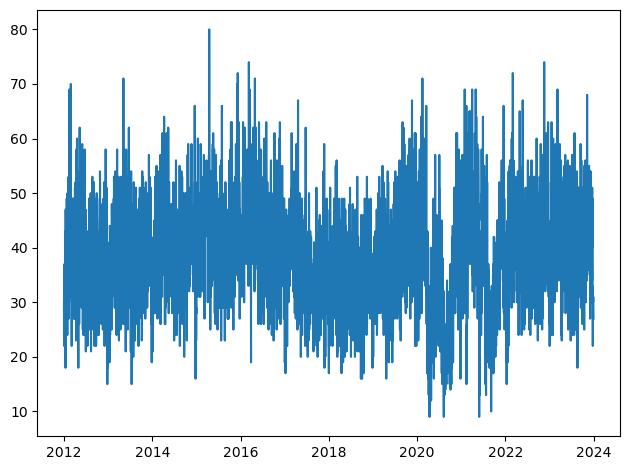

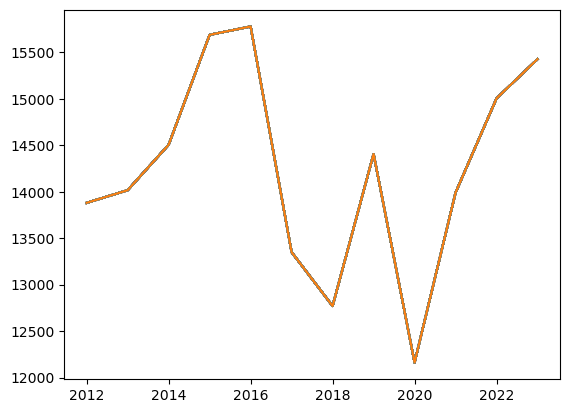

[1077, 1238, 1244, 1214, 1275, 1102, 1104, 1165, 1047, 1170, 1141, 1104, 1023, 1192, 1247, 1172, 1258, 1174, 1110, 1124, 1121, 1220, 1196, 1180, 1110, 1159, 1355, 1199, 1310, 1176, 1132, 1186, 1103, 1302, 1263, 1211, 1261, 1248, 1470, 1338, 1417, 1170, 1301, 1177, 1154, 1414, 1296, 1444, 1240, 1402, 1412, 1411, 1430, 1279, 1319, 1313, 1155, 1283, 1300, 1236, 1038, 1194, 1341, 1129, 1151, 1074, 1038, 1055, 921, 1134, 1178, 1097, 1006, 1064, 1219, 1039, 1113, 1019, 1059, 1079, 950, 1115, 1067, 1040, 1023, 1080, 1151, 1073, 1172, 1039, 1244, 1274, 1248, 1434, 1393, 1276, 1213, 1438, 1206, 607, 957, 1055, 933, 633, 718, 896, 1250, 1256, 1226, 1164, 1544, 1356, 1312, 1137, 1129, 879, 813, 970, 1202, 1259, 1033, 1261, 1462, 1242, 1331, 1166, 1225, 1246, 1185, 1272, 1248, 1335, 1265, 1286, 1452, 1237, 1347, 1187, 1359, 1271, 1263, 1273, 1305, 1184]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39

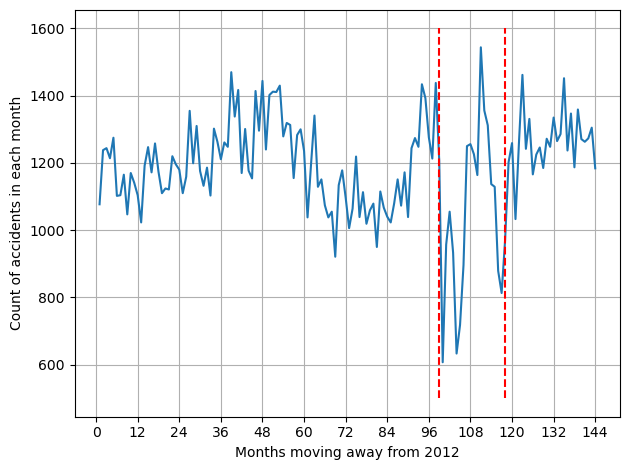

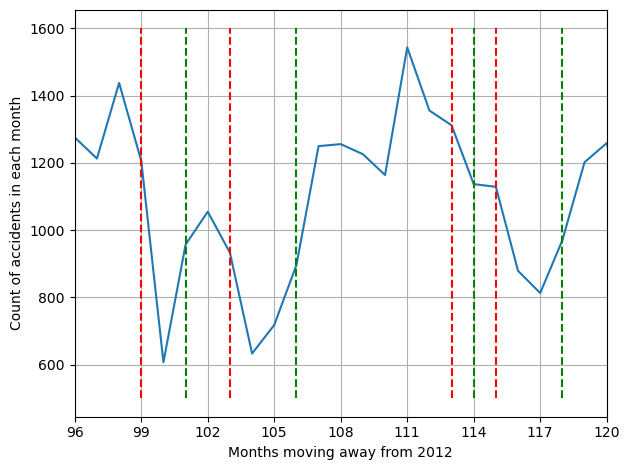